# Calculating the Rate of Return of a Portfolio of Securities

In [52]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo',start = '1995-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6806 entries, 1995-01-03 to 2022-01-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6806 non-null   float64
 1   MSFT    6806 non-null   float64
 2   F       6806 non-null   float64
 3   GE      6806 non-null   float64
dtypes: float64(4)
memory usage: 265.9 KB


In [5]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.014158,2.374854,4.358236,32.877316
1995-01-04,7.949920,2.392119,4.475500,32.877316
1995-01-05,7.837495,2.352660,4.436413,32.957893
1995-01-06,7.853558,2.392119,4.436413,32.796726
1995-01-09,7.821434,2.377321,4.514588,32.474407


In [6]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-01-05,164.210007,316.380005,23.660000,99.370003
2022-01-06,162.830002,313.880005,24.459999,99.949997
2022-01-07,162.740005,314.040009,24.440001,101.400002
2022-01-10,160.520004,314.269989,23.850000,99.419998
2022-01-11,157.270004,311.290009,23.570000,100.519997


## Normalizaation to 100

- Divide the adjusted price value of a certain date by the very first number 
- Multiply answer by 100 to normalize data 
- This ensures all lines on graph start at same value of 100

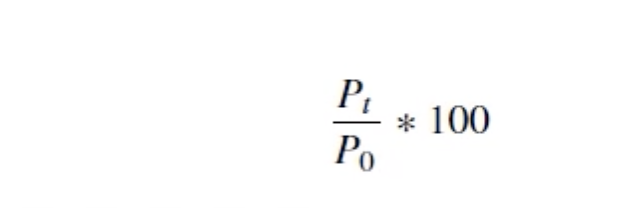

In [46]:
from IPython.display import Image
Image("formula.png")

In [7]:
mydata.iloc[0]

PG       8.014158
MSFT     2.374854
F        4.358236
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

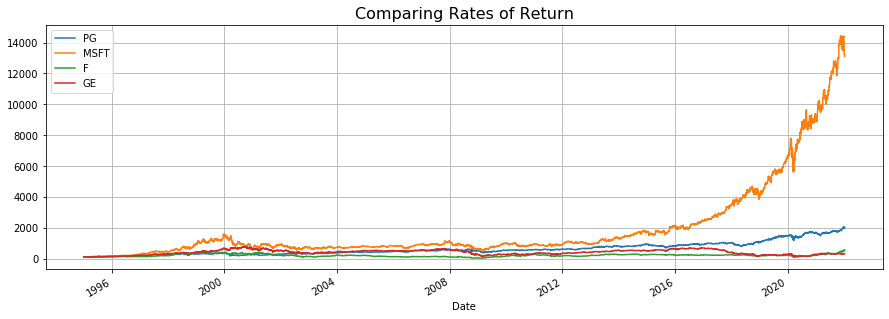

In [60]:
(mydata / mydata.iloc[0] * 100 ).plot(figsize = (15,5))
plt.grid()
plt.title('Comparing Rates of Return', fontsize=16)
plt.show()


- Microsoft is a fair winner, defeats stock price performance 
- from 1995 to 2007: GE performed better than PG. 


- If we did not normalize the data we can see that each line on the graph does not begin at the same point. 

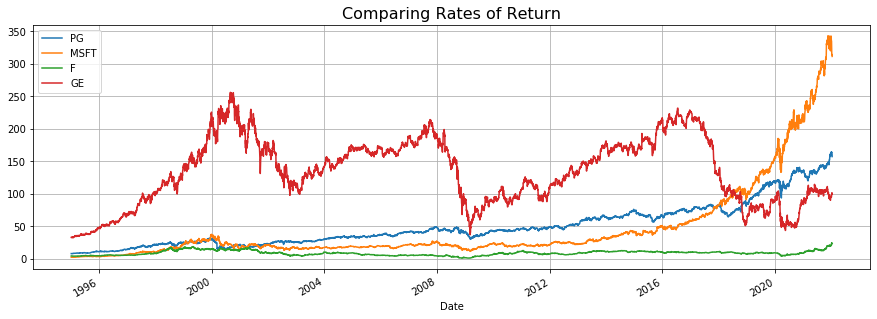

In [58]:
mydata.plot(figsize = (15,5))
plt.grid()
plt.title('Comparing Rates of Return', fontsize=16)
plt.show()

In [27]:
mydata.loc['1995-01-03']

PG       8.014158
MSFT     2.374854
F        4.358236
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

In [28]:
mydata.iloc[0]

PG       8.014158
MSFT     2.374854
F        4.358236
GE      32.877316
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating The Return of a Portfolio of Securities

In [33]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007270,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [34]:
weights = np.array([0.25,0.25,0.25,0.25])

In [35]:
np.dot(returns,weights)

array([        nan,  0.00654011, -0.0092299 , ...,  0.00341169,
       -0.01414412, -0.00760121])

In [36]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.134404
MSFT    0.228083
F       0.141982
GE      0.092328
dtype: float64

In [37]:
np.dot(annual_returns,weights)

0.14919939327584347

In [41]:
pfolio_1 = str(round(np.dot(annual_returns,weights), 5) * 100) + '%'
print(pfolio_1)

14.92%


In [42]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [45]:
pfolio_2 = str(round(np.dot(annual_returns,weights_2), 5) * 100) + '%'
print(pfolio_1)
print(pfolio_2)

14.92%
17.091%


We see that portfolio 2 had a greater return than portfolio 1